In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('student_habits_performance.csv')

In [ ]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


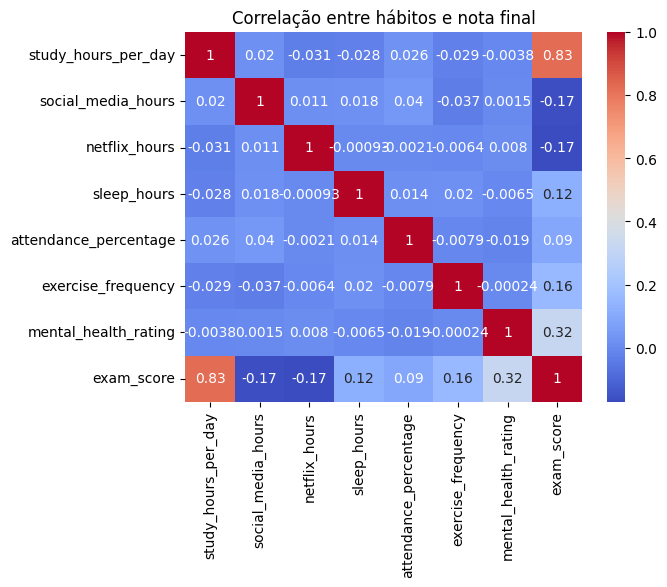

In [ ]:
cols = [
    "study_hours_per_day",
    "social_media_hours",
    "netflix_hours",
    "sleep_hours",
    "attendance_percentage",
    "exercise_frequency",
    "mental_health_rating",
    "exam_score"
]

sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre hábitos e nota final')
plt.show()

Alunos que estudam mais possuem altas maiores?

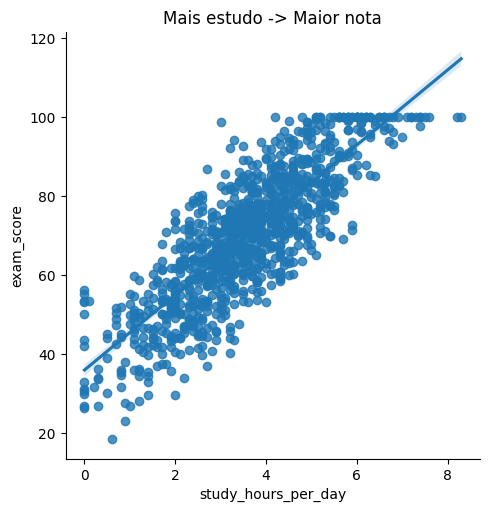

In [ ]:
sns.lmplot(data=df,x="study_hours_per_day", y="exam_score")
plt.title("Mais estudo -> Maior nota")
plt.show()

In [ ]:
filtro_estudo_alto = df["study_hours_per_day"] > 5
filtro_estudo_baixo = df["study_hours_per_day"] < 2


grupo_estudo_alto = df[filtro_estudo_alto]["exam_score"]
grupo_estudo_baixo = df[filtro_estudo_baixo]["exam_score"]


print("Média de estudo mais de 5 horas:", grupo_estudo_alto.mean())
print("Média de estudo menos de 2 horas: " , grupo_estudo_baixo.mean())

Média de estudo mais de 5 horas: 90.79419354838709
Média de estudo menos de 2 horas:  45.56390977443609


O tempo gasto em redes sociais afeta o desempenho dos alunos?

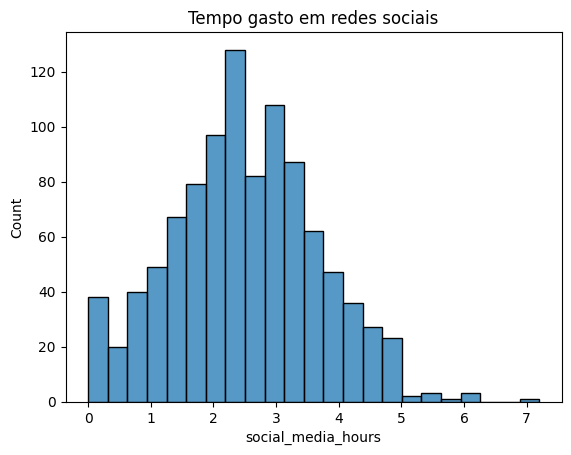

In [ ]:
sns.histplot(data=df,x="social_media_hours")
plt.title("Tempo gasto em redes sociais")
plt.show()

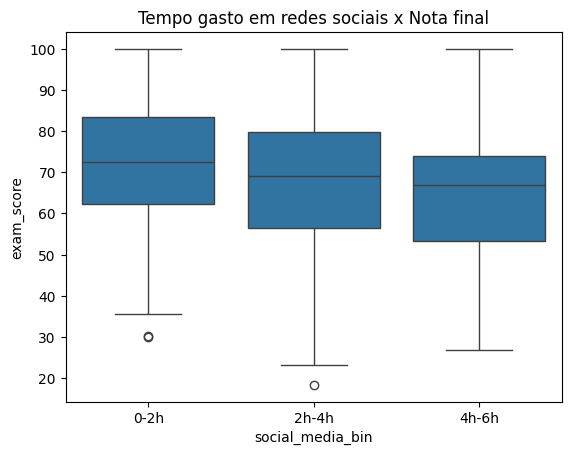

In [ ]:
df["social_media_bin"] = pd.cut(
    df["social_media_hours"],
    bins= [0, 2, 4, 6],
    labels=["0-2h", "2h-4h", "4h-6h" ]
)

sns.boxplot(x="social_media_bin",y="exam_score", data=df)
plt.title("Tempo gasto em redes sociais x Nota final")
plt.show()

Alunos mais saudáveis têm melhores desempenhos

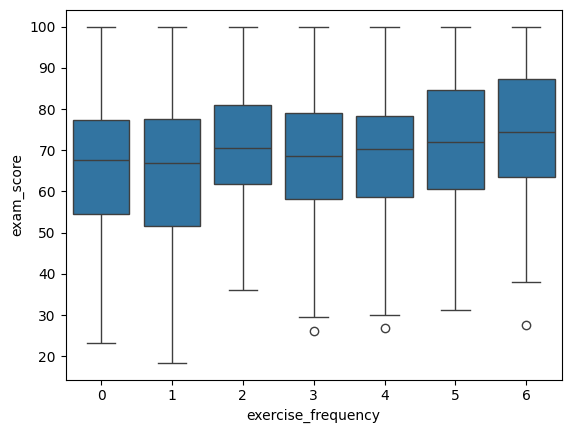

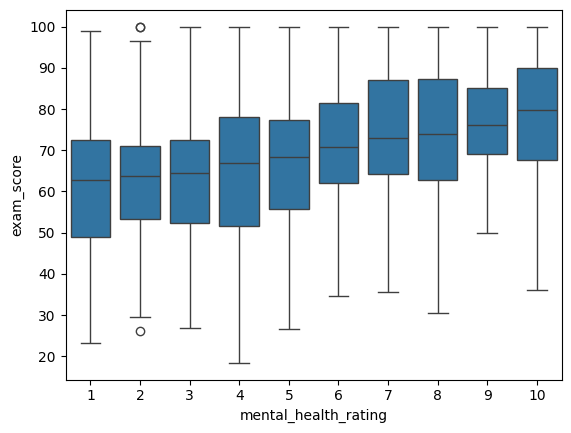

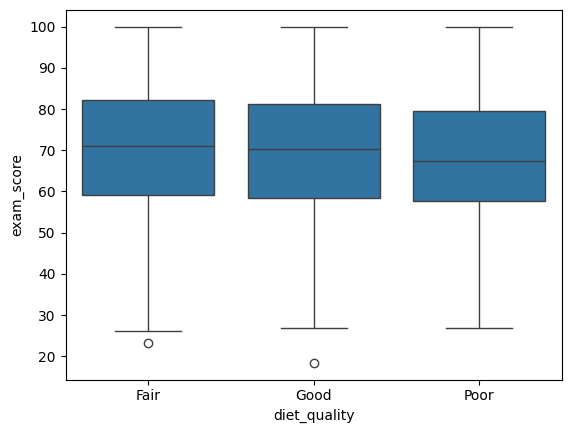

In [ ]:
for col in ["exercise_frequency", "mental_health_rating", "diet_quality"]:
    sns.boxplot(x=col, y="exam_score", data=df)
    plt.show()
